In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
# outlying GBM duplication gene index 7290

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

In [3]:
lgg_p = 'LGG.focal_score_by_genes.txt'
gbm_p = 'GBM.focal_score_by_genes.txt'

In [4]:
lgg_df = pd.read_csv(lgg_p, sep = '\t')
gbm_df = pd.read_csv(gbm_p, sep = '\t')

In [5]:
b = set()
indices = []
for i, e in enumerate(gbm_df['Cytoband']):
    e = e.replace('p', 'q')
    e = e.split('q')[0]
    if e not in b:
        b.add(e)
        indices.append(i)

In [5]:
gbm_df

,Gene Symbol,Gene ID,Cytoband,e8676c22-f544-41c3-9075-8c8c9a791db7,369bd9e1-189d-4745-9d18-bba6fa5529c2,1a6f1433-fdfe-4c7e-b8c0-7ad4e781de45,32043c4d-b680-4d48-ba8d-643a07a8f770,1db553ca-f693-4f6c-9caf-29709a65f3c6,ed02a29d-d035-462c-8f75-dd24ffadee4a,09a4b6c0-e0fb-4eda-a19f-62316d247f5f,...,dd304b99-dbcd-463b-b6d0-5d17f7f83aed,ea62ace8-fdd6-4826-9abb-a84ab521517d,090893f7-e2f2-48a3-880f-e89a6f2edffb,29b33850-f1c5-4149-b756-3eebdbea1e75,639a9665-d2e6-4c11-aee8-d99b72515bc9,3eb0c7b6-5cf4-48c6-a888-9d3ee8ad5ff3,3d3b8c16-8491-4f66-ba9c-0215fc5408ad,9a047584-a826-4e02-b7b2-7e589d43ce71,3b43f349-6929-4cab-833a-20eac7230afe,bebc20c2-a50b-4e90-9fcd-8f1d6df75727
0,ENSG00000008128.21,0,1p36.33,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
1,ENSG00000008130.14,0,1p36.33,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
2,ENSG00000067606.14,0,1p36.33,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
3,ENSG00000078369.16,0,1p36.33,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
4,ENSG00000078808.15,0,1p36.33,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
5,ENSG00000107404.16,0,1p36.33,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
6,ENSG00000116151.12,0,1p36.32,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
7,ENSG00000127054.17,0,1p36.33,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
8,ENSG00000131584.17,0,1p36.33,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
9,ENSG00000131591.16,0,1p36.33,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0


In [6]:
al = list(gbm_dup)
al.index(max(al))

7290

In [44]:
gbm_df.iloc[8669]

Gene Symbol                             ENSG00000264545.1
Gene ID                                                 0
Cytoband                                           9p21.3
e8676c22-f544-41c3-9075-8c8c9a791db7                   -1
369bd9e1-189d-4745-9d18-bba6fa5529c2                    0
                                              ...        
3eb0c7b6-5cf4-48c6-a888-9d3ee8ad5ff3                   -1
3d3b8c16-8491-4f66-ba9c-0215fc5408ad                   -1
9a047584-a826-4e02-b7b2-7e589d43ce71                   -1
3b43f349-6929-4cab-833a-20eac7230afe                   -1
bebc20c2-a50b-4e90-9fcd-8f1d6df75727                   -1
Name: 8669, Length: 631, dtype: object

In [6]:
# lgg_df.head(2)

In [7]:
# gbm_df.head(2)

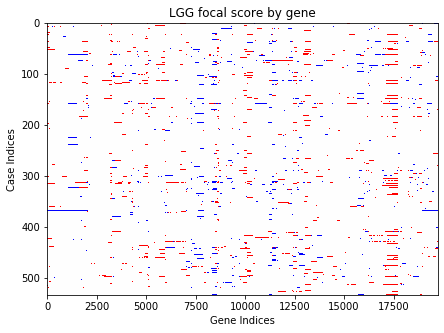

In [31]:
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = [(1, 0, 0, 1), (0, 0, 0, 0), (0, 0, 1, 1)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
'Custom cmap', cmaplist, cmap.N)

plt.imshow(lgg_df.iloc[:, 3:].T, cmap=cmap, aspect='auto')
plt.title('LGG focal score by gene')
plt.xlabel('Gene Indices')
plt.ylabel('Case Indices')
plt.savefig('LGG focal map.png', dpi=300)

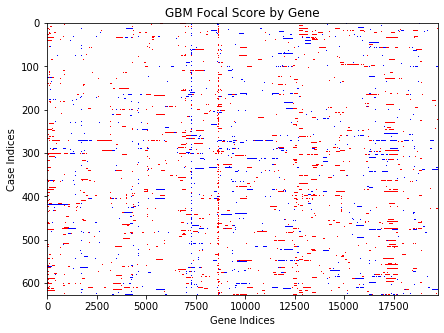

In [30]:
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = [(1, 0, 0, 1), (0, 0, 0, 0), (0, 0, 1, 1)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
'Custom cmap', cmaplist, cmap.N)

plt.imshow(gbm_df.iloc[:, 3:].T, cmap=cmap, aspect='auto')
plt.title('GBM Focal Score by Gene')
plt.xlabel('Gene Indices')
plt.ylabel('Case Indices')
plt.savefig('GBM focal map.png', dpi=300)

In [48]:
print("avg GBM duplications", sum(gbm_pos * len(gbm_df)) / len(gbm_df))
print("avg LGG duplications", sum(lgg_pos * len(lgg_df)) / len(lgg_df))

print("avg GBM deletions", sum(gbm_neg * len(gbm_df)) / len(gbm_df))
print("avg LGG deletions", sum(lgg_neg * len(lgg_df)) / len(lgg_df))

avg GBM additions 7.780272695017487
avg LGG additions 5.265497491003092
avg GBM deletions -14.846976532008718
avg LGG deletions -9.272644330680723


In [45]:
scale = .022

In [5]:
gbm_x = gbm_df.iloc[:, 3:].T.columns
gbm_dup = gbm_df.iloc[:, 3:].T.apply(lambda c: len(c[c>0]))
gbm_del = gbm_df.iloc[:, 3:].T.apply(lambda c: len(c[c<0])) * -1
gbm_dup = gbm_dup / len(gbm_df)
gbm_del = gbm_del / len(gbm_df)

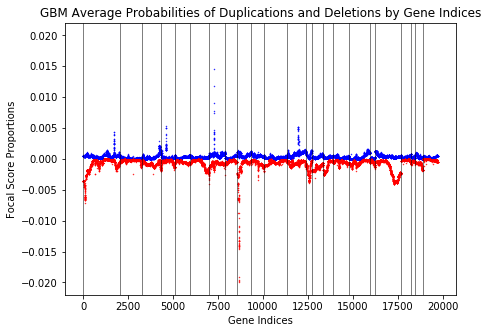

In [46]:
plt.scatter(gbm_x, gbm_dup, s=.2, color='blue')
plt.scatter(gbm_x, gbm_del, s=.2, color='red')
gbm_axes = plt.gca()
gbm_axes.set_ylim([scale*-1, scale])
plt.title('GBM Average Probabilities of Duplications and Deletions by Gene Indices')
plt.xlabel('Gene Indices')
plt.ylabel("Focal Score Proportions")
for i in indices:
    plt.axvline(x=i, color='black', linewidth=.5)
plt.savefig('GBM probabilities zoomed and delineated', dpi=300)

In [14]:
lgg_x = lgg_df.iloc[:, 3:].T.columns
lgg_dup = lgg_df.iloc[:, 3:].T.apply(lambda c: len(c[c>0]))
lgg_del = lgg_df.iloc[:, 3:].T.apply(lambda c: len(c[c<0])) * -1
lgg_dup = lgg_dup / len(lgg_df)
lgg_del = lgg_del / len(lgg_df)

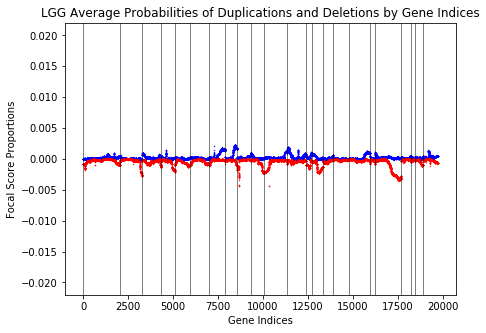

In [47]:
lgg_axes = plt.gca()
lgg_axes.set_ylim([scale*-1, scale])

plt.scatter(lgg_x, lgg_dup, s=.2, color='blue')
plt.scatter(lgg_x, lgg_del, s=.2, color='red')
plt.title('LGG Average Probabilities of Duplications and Deletions by Gene Indices')
plt.xlabel('Gene Indices')
plt.ylabel("Focal Score Proportions")
for i in indices:
    plt.axvline(x=i, color='black', linewidth=.5)
plt.savefig('LGG probabilities zoomed and delineated', dpi=300)